In [1]:
"""
Created on Wed Jan 10 17:13:16 2024
@author: Wu Yuxuan
"""

import os
import warnings

from gseapy import Msigdb
import decoupler as dc
import gseapy as gp
from gseapy import barplot, dotplot
import scFates as scf
import pandas as pd
import anndata as ad
import scanpy as sc
import seaborn as sns
import numpy as np
from matplotlib import rc_context
from adjustText import adjust_text
from matplotlib import pyplot as plt
from ridgeplot import ridgeplot

import cellrank as cr
# import scanpy as sc
import scvelo as scv

from statannotations.Annotator import Annotator

In [2]:
seed = 1
warnings.simplefilter(action='ignore', category=FutureWarning)
# info
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.set_figure_params(vector_friendly=True, dpi_save=1200) 
sc.logging.print_header()

scanpy==0.1.dev3254+g5b9bc72 anndata==0.10.3 umap==0.5.5 numpy==1.26.0 scipy==1.11.3 pandas==1.5.2 scikit-learn==1.1.3 statsmodels==0.14.0 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.11


In [3]:
os.chdir('/home/wu/datb1/reseq_ppp/Pub_PPP_code')

In [4]:
sns.set_style("white")

In [5]:
adata_immu = sc.read_h5ad('/home/wu/datb1/reseq_ppp/processed_data/IMMU_PPP_10X.h5ad')

In [11]:
adata_immu.obs[adata_immu.obs.batch_group == 'Lesion'].leiden.value_counts() / adata_immu.obs[adata_immu.obs.batch_group == 'Lesion'].leiden.shape[0]

PPP neutrophil                 0.318350
Helper T cell                  0.296985
Langerhans cell                0.093877
INHBA+ Macrophage              0.066500
Mast cell                      0.048280
Classical dendritic cell       0.045043
CD8+ T cell                    0.044395
Regulatory T cell              0.042083
Macrophage                     0.029504
Plasmacytoid dendritic cell    0.014983
Name: leiden, dtype: float64

In [6]:
adata_immu.uns['leiden_colors'][0] = '#d62728'
adata_immu.uns['leiden_colors'][3] = '#1f77b4'

In [7]:
adata_immu.obs['batch_group'] = adata_immu.obs.batch_group.cat.reorder_categories(['HC', 'NL', 'Lesion'])
adata_immu.uns['batch_group_colors'] = ['#3182bd', '#31a354', '#fd8d3c']

### Metadata

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:20)


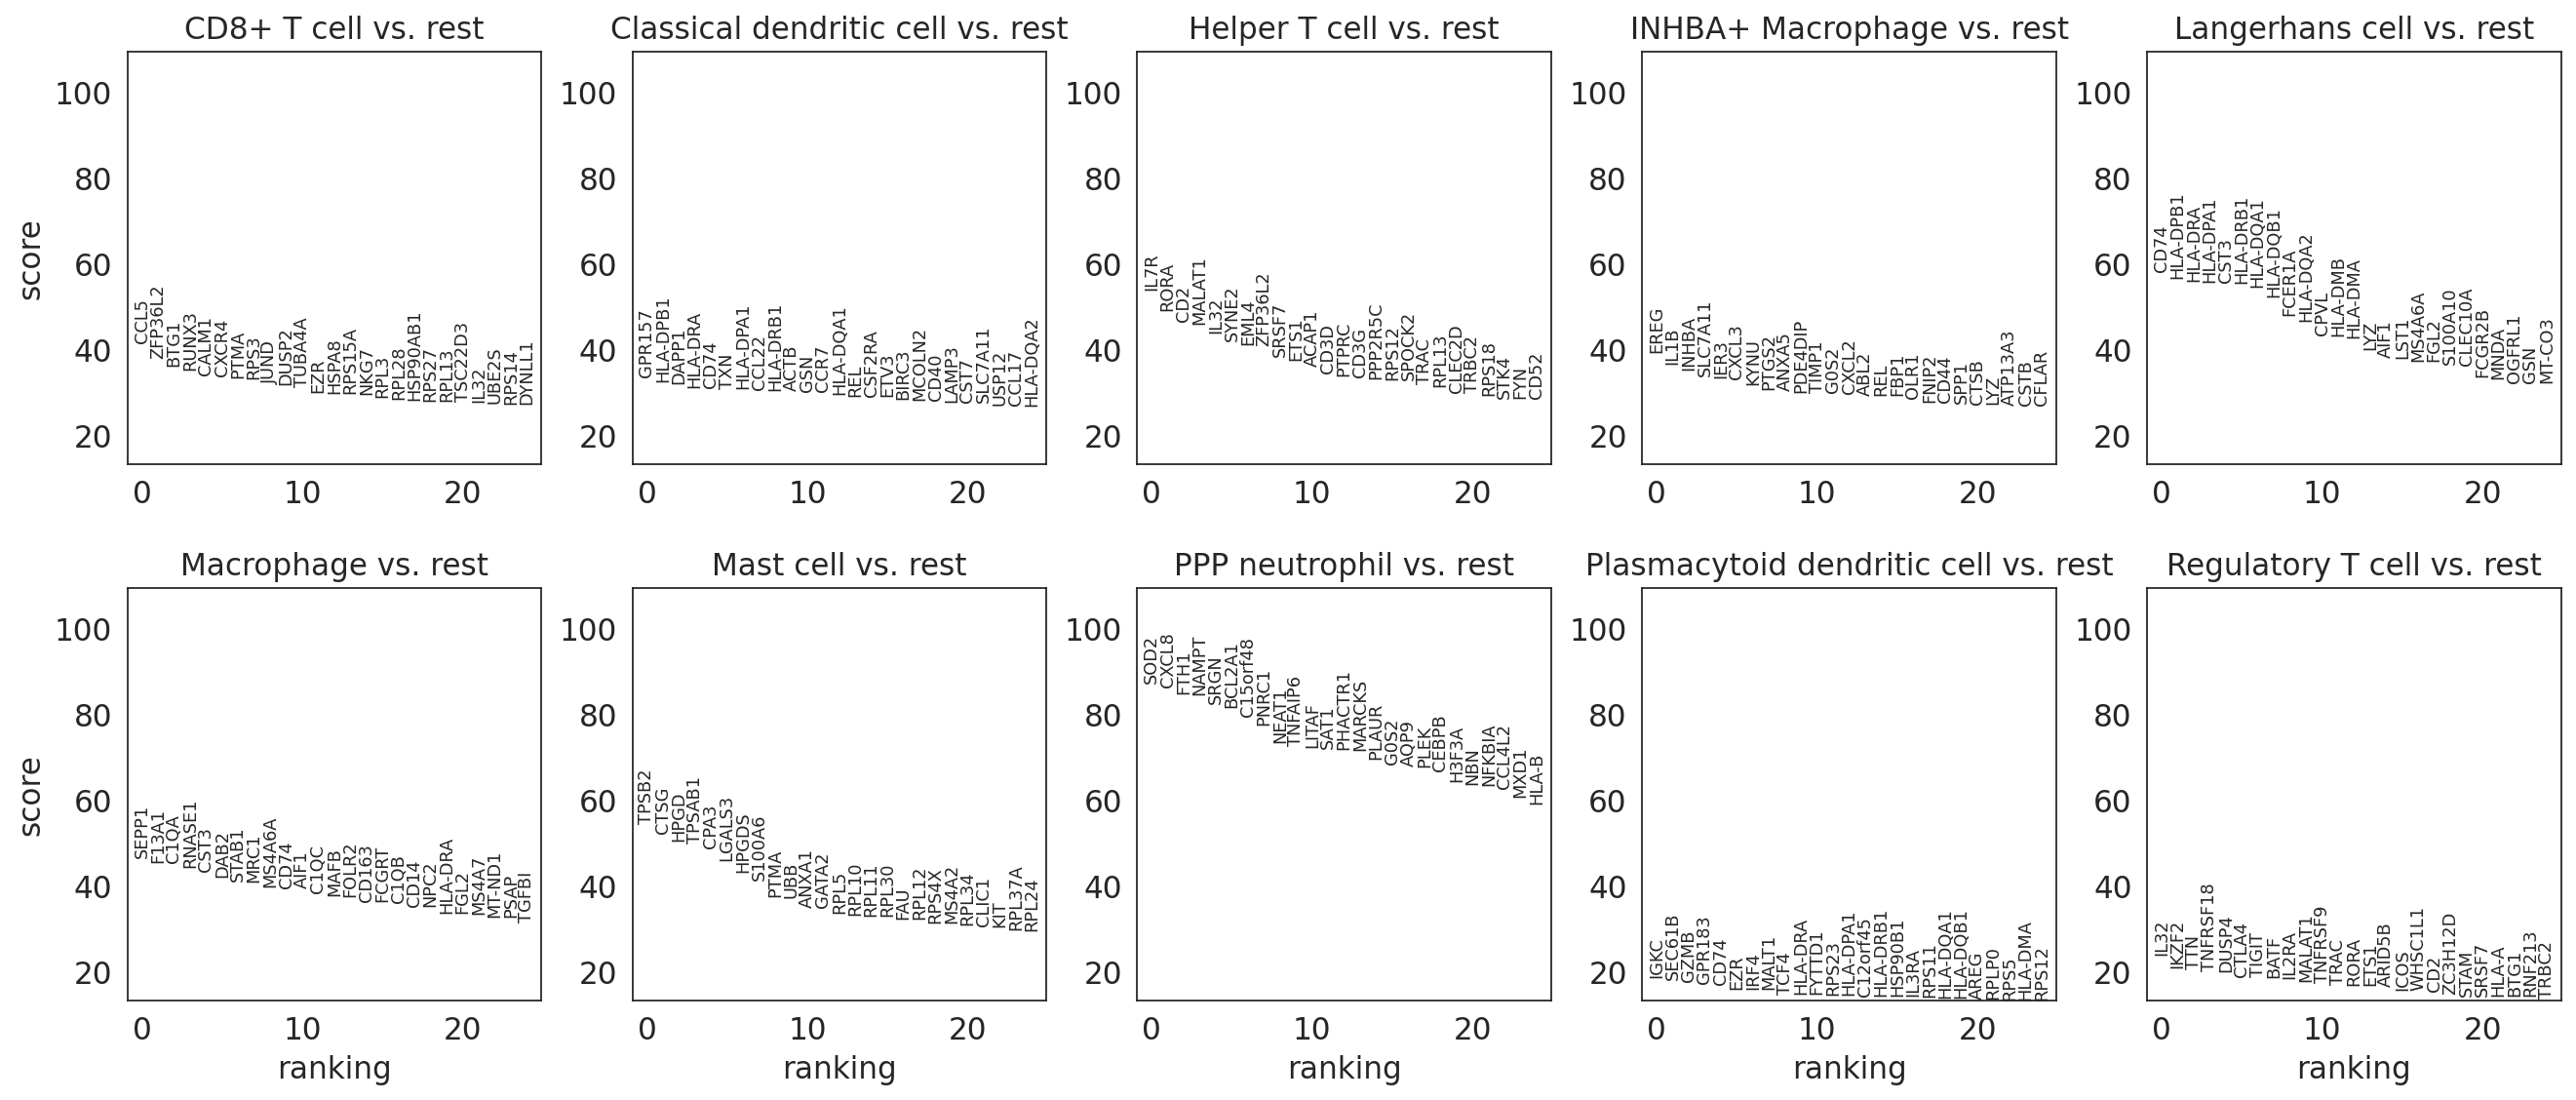

In [8]:
sc.tl.rank_genes_groups(adata_immu, groupby='leiden', method='wilcoxon', n_genes=1000, use_raw=True)
sc.pl.rank_genes_groups(adata_immu, n_genes=25, ncols=5)

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


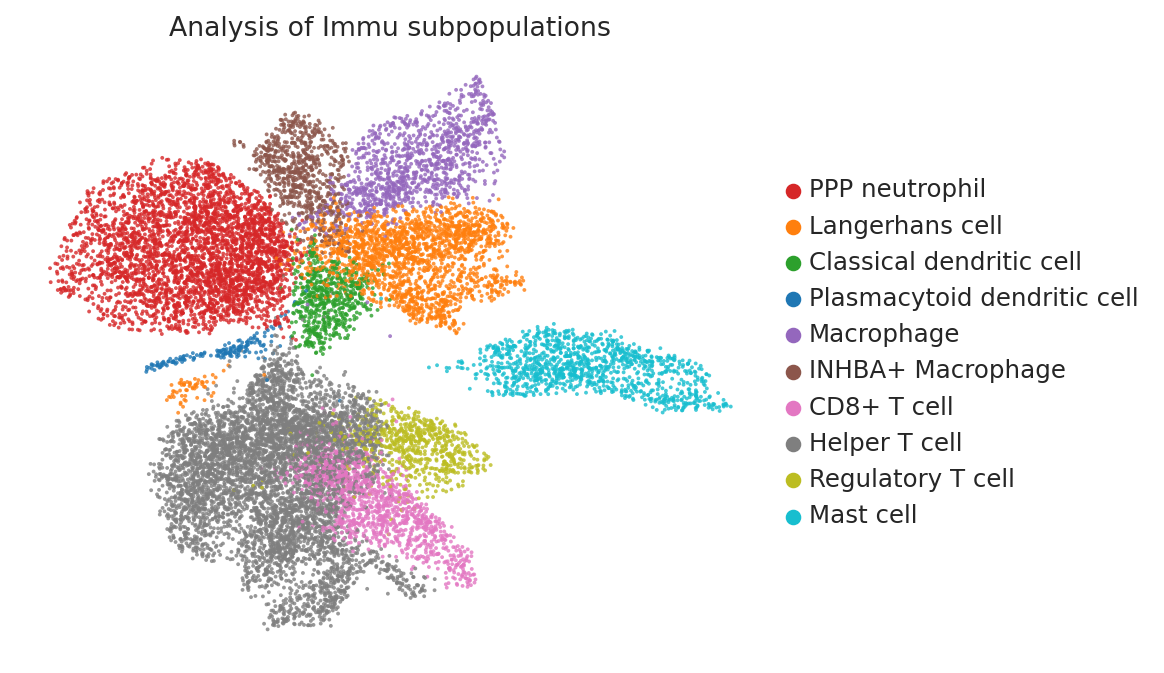

In [23]:
with rc_context({'figure.figsize': (6, 5)}):
    ax = sc.pl.umap(adata_immu, color=['leiden'], show=False, frameon=False, size=12, alpha=0.8)
    # set ax x and y label
    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    plt.title("Analysis of Immu subpopulations")
    plt.savefig('figures/fig4/Immu_subpopulations.pdf', bbox_inches='tight')
    plt.show()

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:376: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:386: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


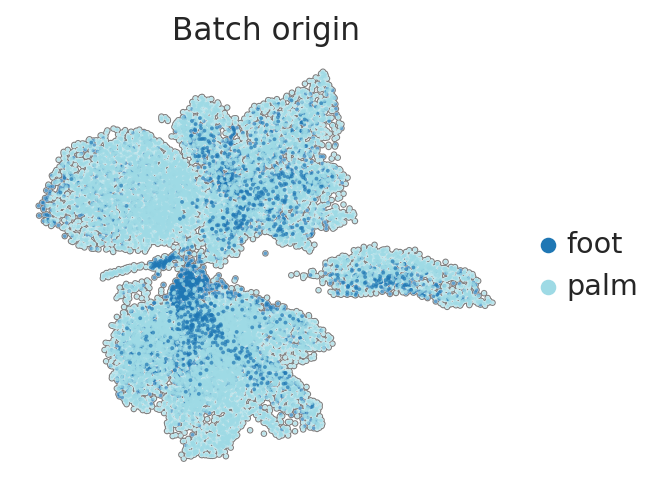

In [10]:
with rc_context({'figure.figsize': (4, 3.5)}):
    ax = sc.pl.umap(adata_immu, color=['batch_origin'], palette='tab20', show=False, frameon=False, size=12, alpha=0.7, add_outline=True, outline_color=('grey', 'white'))
    # set ax x and y label
    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    plt.title("Batch origin")
    plt.savefig('figures/fig4/Batch_origin.pdf', bbox_inches='tight')
    plt.show()

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:376: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:386: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


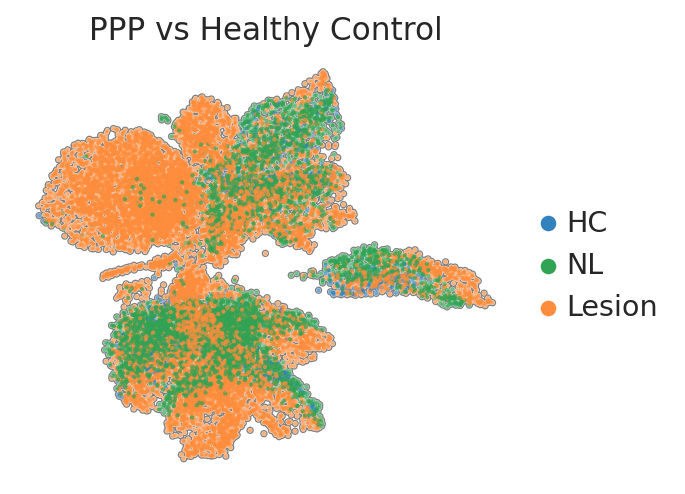

In [11]:
with rc_context({'figure.figsize': (4, 3.5)}):
    ax = sc.pl.umap(adata_immu, color=['batch_group'], show=False, frameon=False, size=15, alpha=0.7, add_outline=True, outline_color=('grey', 'white'), groups=['HC', 'NL', 'Lesion'], sort_order=False)
    # set ax x and y label
    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    plt.title("PPP vs Healthy Control")
    plt.savefig('figures/fig4/Batch_group.pdf', bbox_inches='tight')
    plt.show()

### DE number of clusters

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
Cluster CD8+ T cell has 35 DE genes
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
Cluster Classical dendritic cell has 8 DE genes
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.

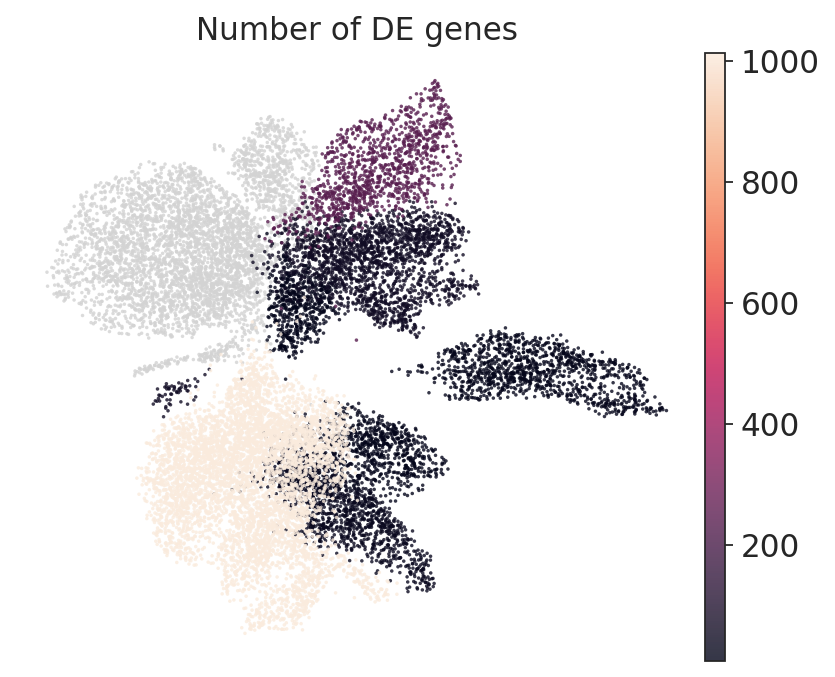

In [12]:
# examine diff expression of each cluster
for cluster in adata_immu.obs.leiden.cat.categories:
    _adata = adata_immu[adata_immu.obs.leiden == cluster].copy()
    sc.tl.rank_genes_groups(_adata, groupby='Meta', groups=['Lesion'], method='wilcoxon', use_raw=True, tie_correct=True,
                            n_genes=20000)
    diff_exp_cluster_df = sc.get.rank_genes_groups_df(_adata, group='Lesion', pval_cutoff=1e-4, log2fc_min=1)
    adata_immu.obs.loc[_adata.obs.index, 'Lesion_DE'] = diff_exp_cluster_df.shape[0]
    print(f"Cluster {cluster} has {diff_exp_cluster_df.shape[0]} DE genes")
    
frac_series = adata_immu.obs[adata_immu.obs.Meta == 'Lesion'].groupby('leiden').Meta.count() / adata_immu.obs.groupby('leiden').Meta.count()
exclude_list = frac_series[(frac_series > 0.9) | (frac_series < 0.1)].index.tolist()
for cluster in adata_immu.obs.leiden.cat.categories:
    if cluster in exclude_list:
        adata_immu.obs.loc[adata_immu.obs.leiden == cluster, 'Lesion_DE'] = np.nan
        
# plot figure
with rc_context({'figure.figsize': (6, 5)}):
    ax = sc.pl.umap(adata_immu, color=['Lesion_DE'], show=False, frameon=False, size=10, alpha=0.8)
    # set ax x and y label
    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    plt.title("Number of DE genes")
    plt.savefig('figures/fig4/DE_genes.pdf', bbox_inches='tight')
    plt.show()

### MT expression

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


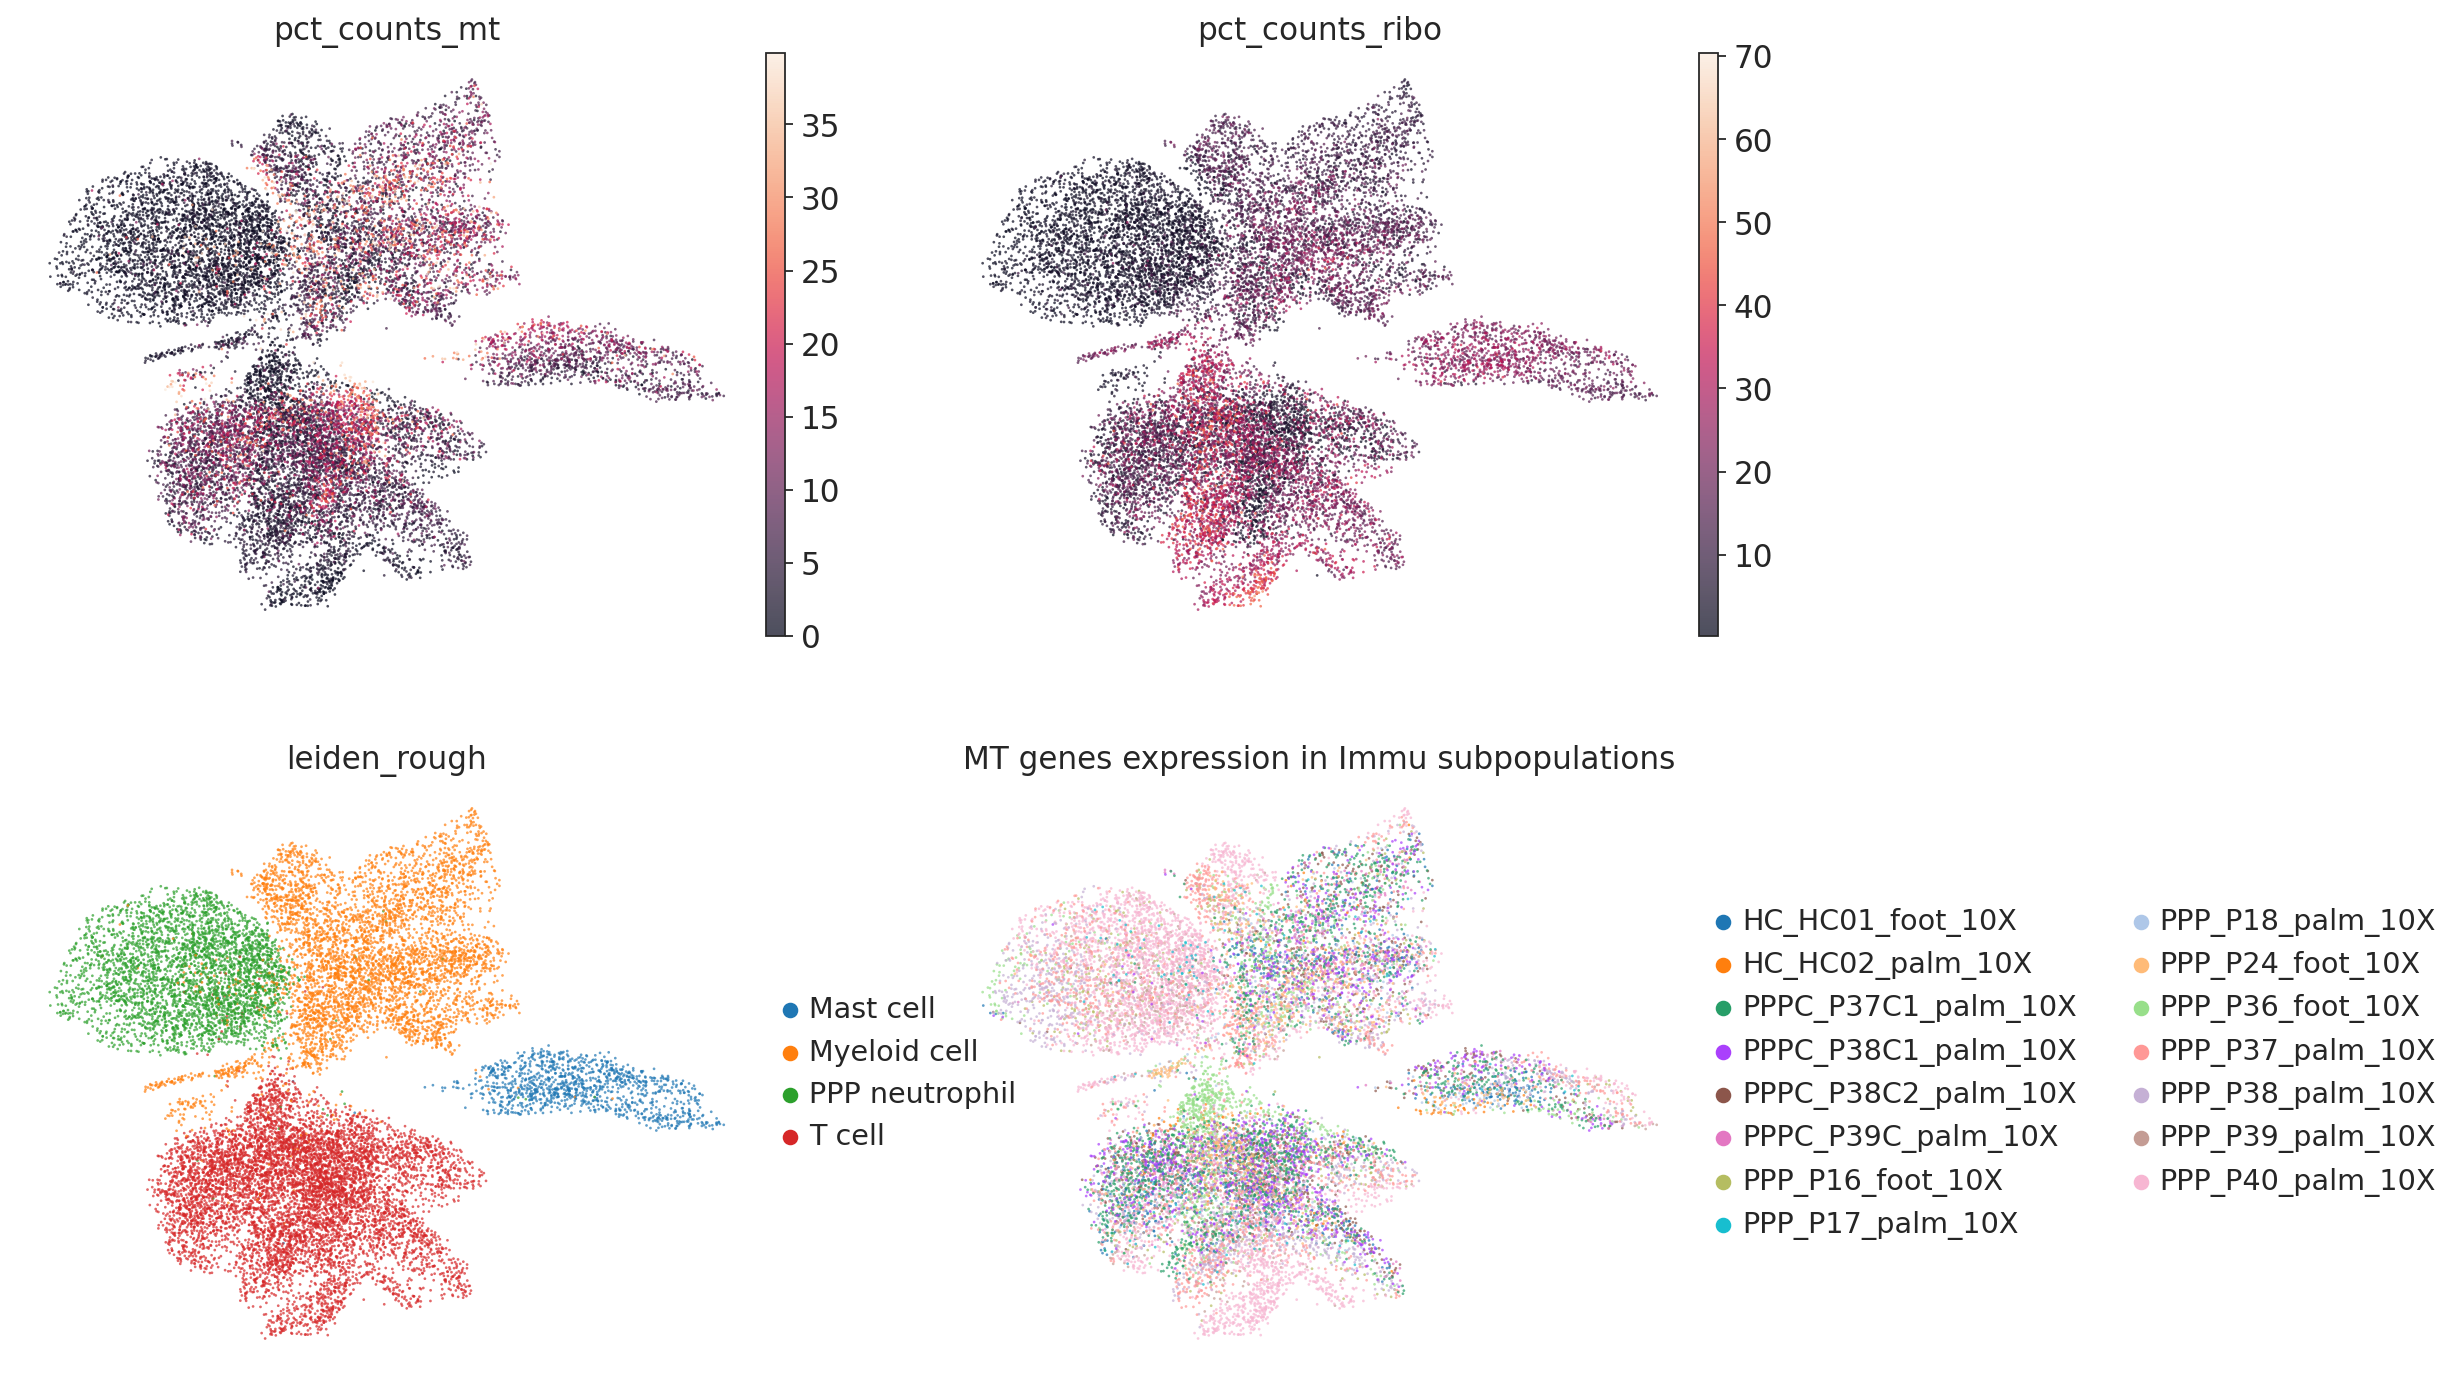

In [13]:
with rc_context({'figure.figsize': (6, 5)}):
    ax = sc.pl.umap(adata_immu, color=['pct_counts_mt', 'pct_counts_ribo', 'leiden_rough', 'batch'], show=False, frameon=False, size=6, alpha=0.7, ncols=2)
    # set ax x and y label
    plt.title("MT genes expression in Immu subpopulations")
    plt.savefig('figures/fig4/Immune_MT_genes.pdf', bbox_inches='tight')
    plt.show()

### Marker gene

In [14]:
adata_immu.obs['leiden'] = adata_immu.obs['leiden'].cat.reorder_categories(
    ['PPP neutrophil', 'Langerhans cell', 'Classical dendritic cell', 'Plasmacytoid dendritic cell', 
     'Macrophage', 'INHBA+ Macrophage', 'CD8+ T cell', 
     'Helper T cell', 'Regulatory T cell', 'Mast cell'
     ]
)

/home/wu/scanpy/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


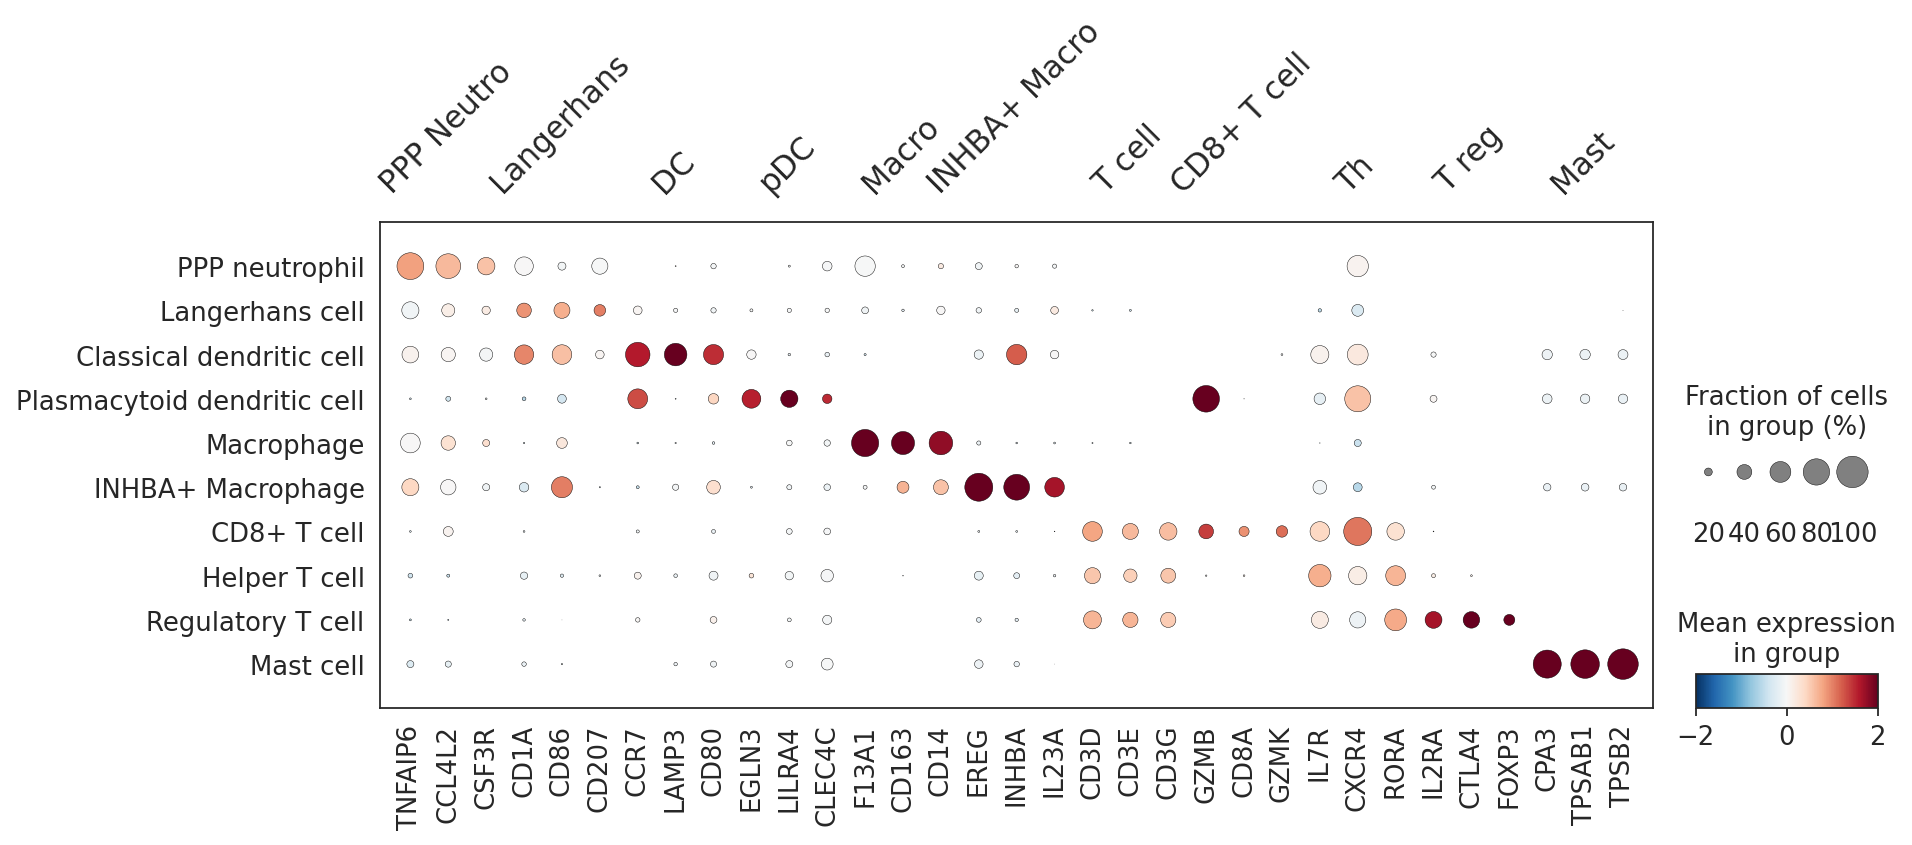

In [15]:
marker_gene = {'PPP Neutro': ['TNFAIP6', 'CCL4L2', 'CSF3R'],
                'Langerhans': ['CD1A', 'CD86', 'CD207'], # Langerhans cell
                'DC': ['CCR7', 'LAMP3', 'CD80',], # Dendritic cell
                'pDC': ['EGLN3', 'LILRA4', 'CLEC4C'],  # plasmacytoid dendritic cell 
               'Macro': ['F13A1', 'CD163', 'CD14'], # Macrophage 
               'INHBA+ Macro': ['EREG', 'INHBA', 'IL23A'],   # INHBA+ Macrophage
               'T cell': ['CD3D', 'CD3E', 'CD3G'], # CD3+ T cell
                'CD8+ T cell': ['GZMB', 'CD8A',  'GZMK'], #  CD8+ T cell
            #    'T17': ['GATA3', 'RORC', 'IL17F'], # Th17/Th2 cell
                'Th': ['IL7R', 'CXCR4', 'RORA'], # Helper T cell
                'T reg': ['IL2RA', 'CTLA4', 'FOXP3'],
                # 'CD4 EMRA': ['PTPRC'], # CD4+ EMRA T cell
                # 'MT-CO1', 'MT-ATP6', 'MT-CYB', # Mito+ T cell
                'Mast': ["CPA3", "TPSAB1", "TPSB2"], # Mast cell
                # 'KLRD1', 'KLRF1', 'KLRB1'
}

with rc_context({'figure.figsize': (8, 7)}):
    ax = sc.pl.dotplot(adata_immu, marker_gene, groupby='leiden', show=False, use_raw=False, dot_max=1, dot_min=0.05, color_map='RdBu_r', vmax=2, vmin=-2, var_group_rotation=45, \
        figsize=(12, 4))
    plt.savefig('figures/fig4/Immu_marker_genes.pdf', bbox_inches='tight')

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


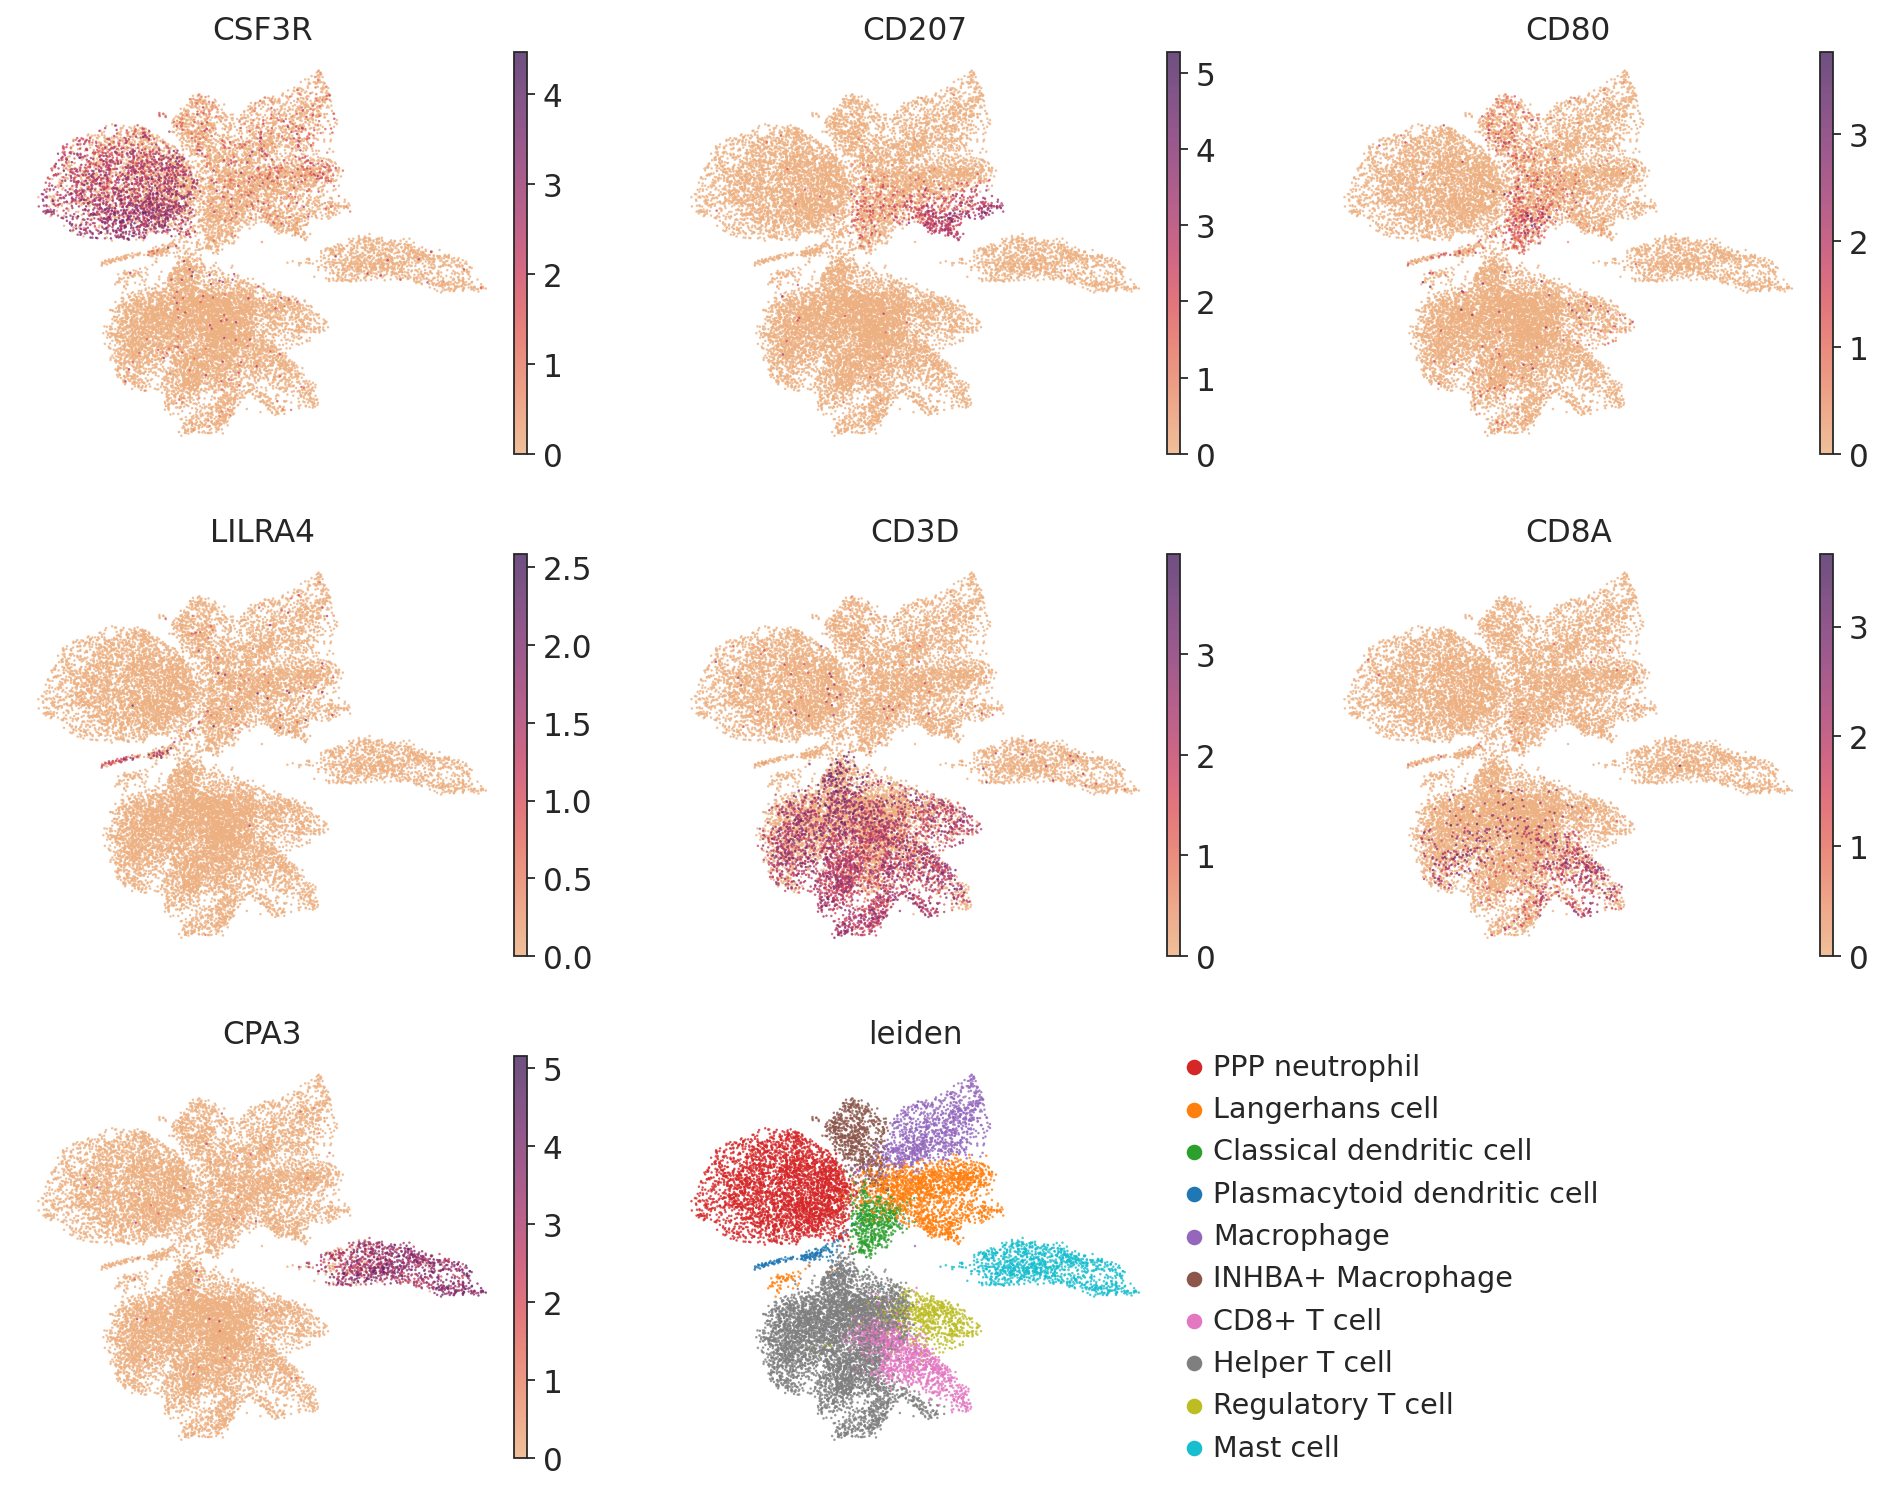

In [16]:
with rc_context({'figure.figsize': (4, 3.5)}):
    ax = sc.pl.umap(adata_immu, color=['CSF3R', 'CD207', 'CD80', 'LILRA4', 'CD3D', 'CD8A', 'CPA3', 'leiden'], ncols=3, size=5, alpha=0.8, show=False, frameon=False, \
        cmap='flare', vmin=0)
    plt.savefig('figures/fig4/Immu_marker_genes_UMAP.pdf', bbox_inches='tight')
    plt.show()

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


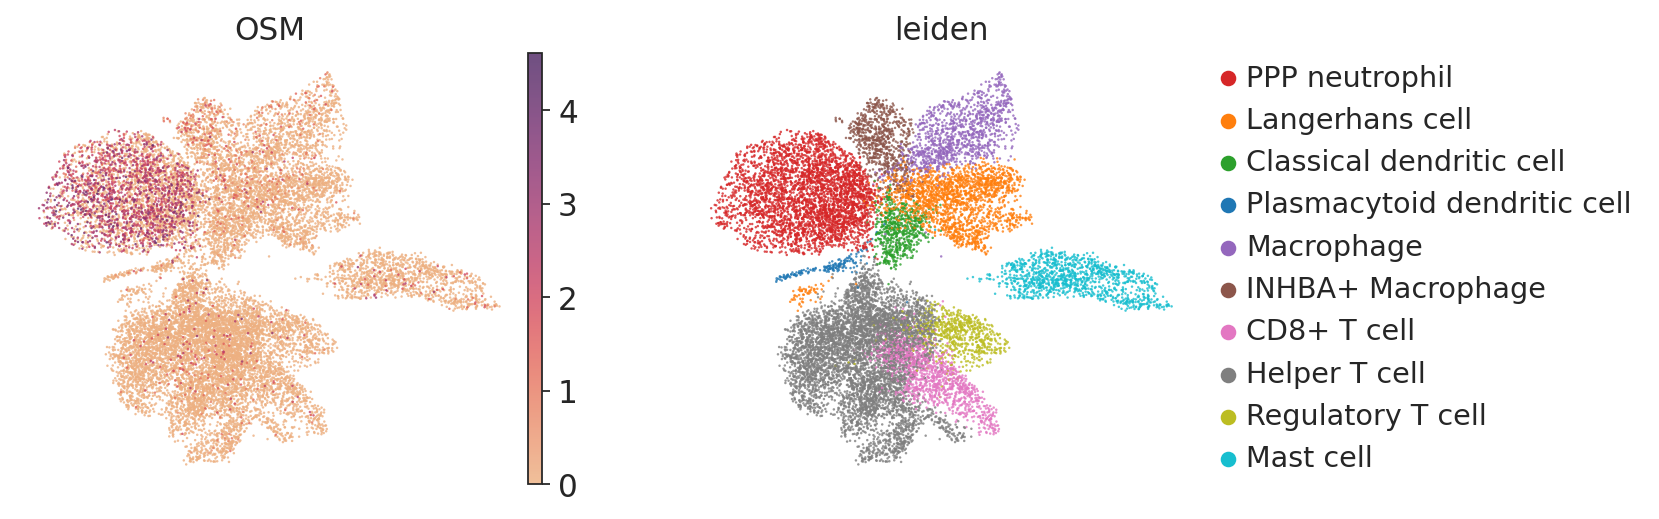

In [17]:
with rc_context({'figure.figsize': (4, 3.5)}):
    ax = sc.pl.umap(adata_immu, color=['OSM', 'leiden'], ncols=3, size=5, alpha=0.8, show=False, frameon=False, \
        cmap='flare', vmin=0)
    plt.savefig('figures/fig4/Immu_OSM_UMAP.pdf', bbox_inches='tight')
    plt.show()

### Stats

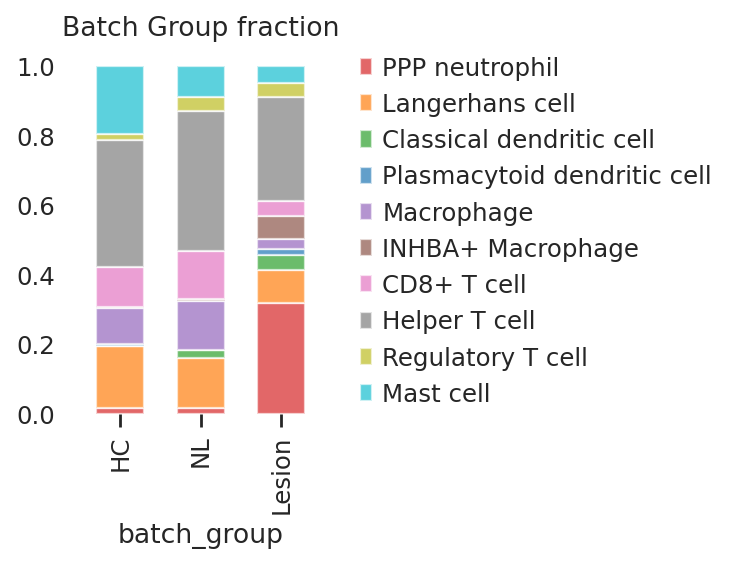

In [18]:
sns.set_theme(style='white')

# adata_immu.obs['batch_group'] = adata_immu.obs.batch_group.cat.reorder_categories(['HC', 'NL', 'Lesion'])

# plot figure
with rc_context({'figure.figsize': (2, 3)}):
    ax = (adata_immu.obs.groupby(['batch_group', 'leiden']).size() / adata_immu.obs.groupby('batch_group').size()).unstack() \
        .plot.bar(stacked=True, color=adata_immu.uns['leiden_colors'], width=0.6, alpha=0.7)
    ax.legend(bbox_to_anchor=(1.1, 0.5), loc='center left', borderaxespad=0., frameon=False)
    sns.despine(left=True, bottom=True)
    plt.title("Batch Group fraction")
    plt.savefig('figures/fig4/Immu_batch_group_fraction.pdf', bbox_inches='tight')
    plt.tick_params(top=False,bottom=True,left=False,right=False)

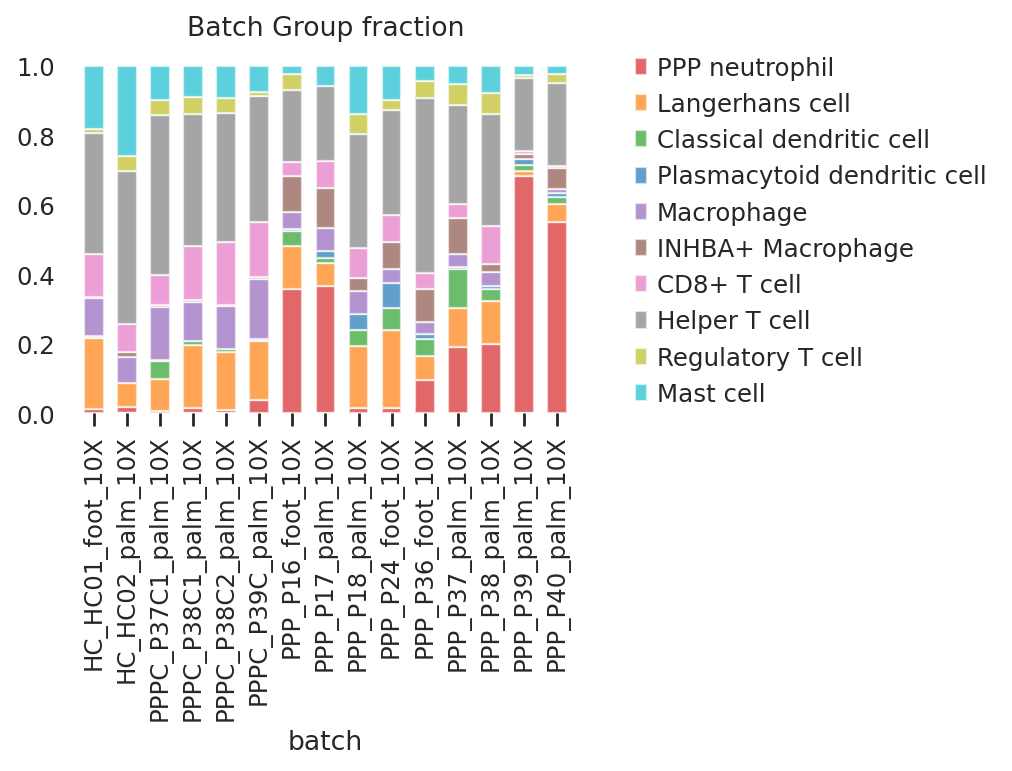

In [19]:
sns.set_theme(style='white')

# adata_immu.obs['batch_group'] = adata_immu.obs.batch_group.cat.reorder_categories(['HC', 'NL', 'Lesion'])

# plot figure
with rc_context({'figure.figsize': (4, 3)}):
    ax = (adata_immu.obs.groupby(['batch', 'leiden']).size() / adata_immu.obs.groupby('batch').size()).unstack() \
        .plot.bar(stacked=True, color=adata_immu.uns['leiden_colors'], width=0.6, alpha=0.7)
    ax.legend(bbox_to_anchor=(1.1, 0.5), loc='center left', borderaxespad=0., frameon=False)
    sns.despine(left=True, bottom=True)
    plt.title("Batch Group fraction")
    plt.savefig('figures/fig4/Immu_batch_fraction.pdf', bbox_inches='tight')
    plt.tick_params(top=False,bottom=True,left=False,right=False)

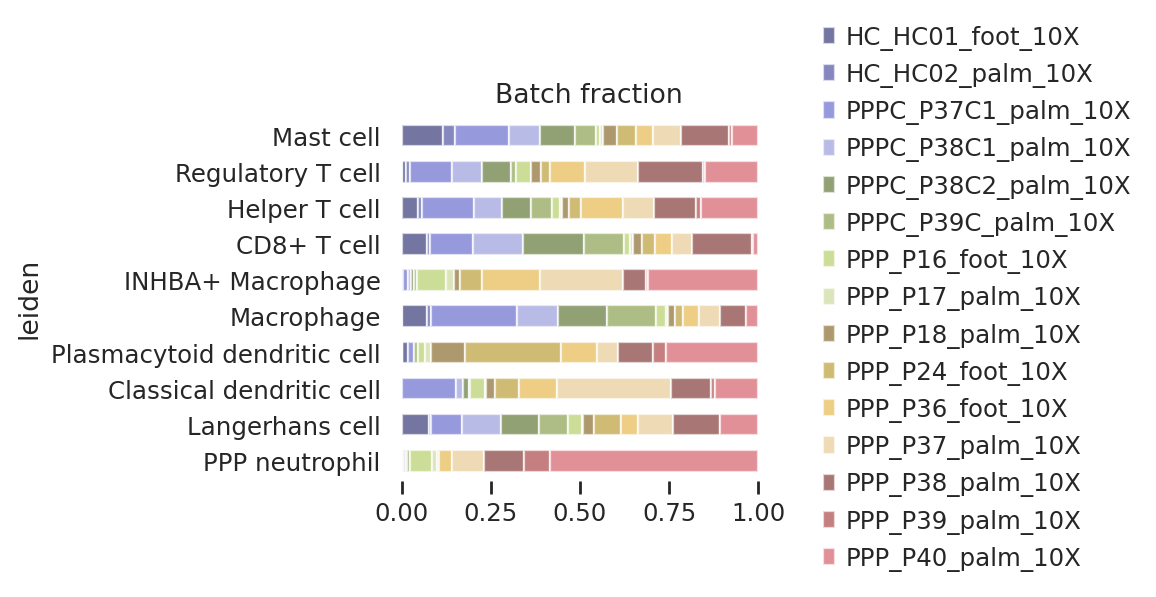

In [20]:
adata_immu.obs['batch'] = adata_immu.obs['batch'].astype('str')
# plot figure
with rc_context({'figure.figsize': (3, 3)}):
    ax = (adata_immu.obs.groupby(['leiden', 'batch']).size() / adata_immu.obs.groupby('leiden').size()).unstack() \
        .plot.barh(stacked=True, color=sns.color_palette("tab20b"), width=0.6, alpha=0.7)
    ax.legend(bbox_to_anchor=(1.1, 0.5), loc='center left', borderaxespad=0., frameon=False)
    sns.despine(left=True, bottom=True)
    plt.tick_params(top=False,bottom=True,left=False,right=False)
    plt.title("Batch fraction")
    plt.savefig('figures/fig4/Immu_batch_leiden_fraction.pdf', bbox_inches='tight')
    plt.show()

### Correlation plot

In [21]:
sc.tl.dendrogram(adata_immu, groupby='leiden', use_raw=True, n_pcs=30)

    using 'X_pca' with n_pcs = 30
Storing dendrogram info using `.uns['dendrogram_leiden']`


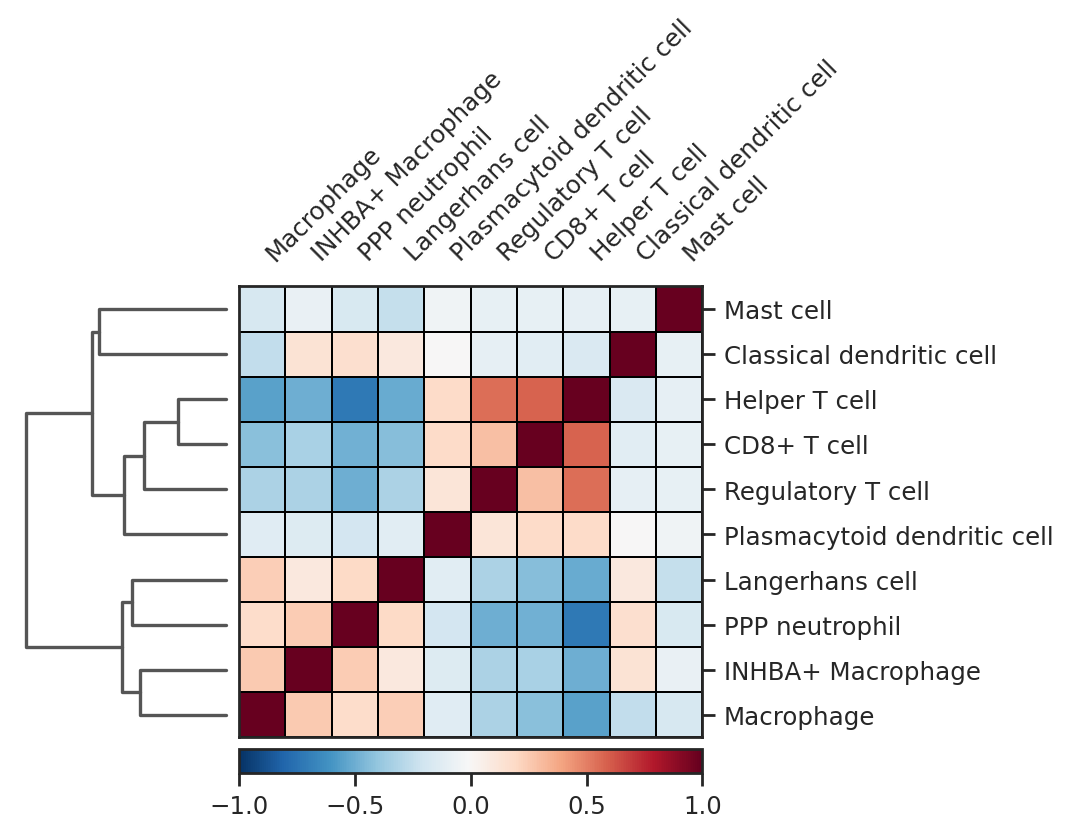

In [22]:
with rc_context({'figure.figsize': (3, 2)}):
    ax = sc.pl.correlation_matrix(adata_immu, groupby='leiden', show=False, figsize=(5.5, 4), cmap='RdBu_r')
    plt.savefig('figures/fig4/Immu_correlation_matrix.pdf', bbox_inches='tight')